In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [204]:
data = pd.read_csv("./downloaded/data.csv")
print data.head()
print data.columns
print data.describe()

                       time  latitude  longitude  depth  mag magType  nst  \
0  1901-08-09T18:33:00.000Z        40        144      0  7.5      mw  NaN   
1  1901-08-09T13:01:00.000Z       -22        170      0  7.9      mw  NaN   
2  1902-04-19T02:23:00.000Z        14        -91      0  7.5      mw  NaN   
3  1902-09-23T20:18:00.000Z        16        -93      0  7.8      mw  NaN   
4  1902-09-22T01:46:00.000Z        18        146      0  7.5      mw  NaN   

   gap  dmin  rms    ...                      updated  \
0  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
1  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
2  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
3  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
4  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   

                                       place        type horizontalError  \
0        off the east coast of Honshu, Japan  earthquake             NaN   
1           southeast of the Loyalty Islan

The mean of the errors horizontal 6.296571 depth 5.858949 mag 0.103239 

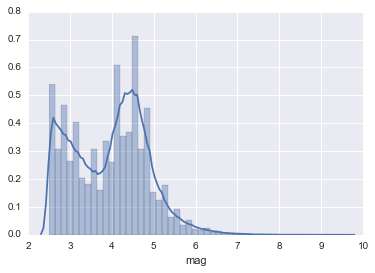

In [205]:
sns.distplot(data.mag)

ValueError: cannot convert float NaN to integer

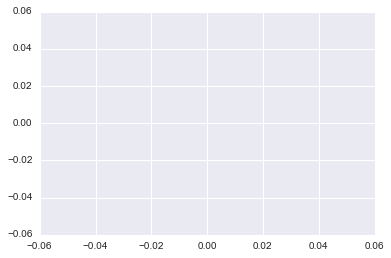

In [206]:
sns.distplot(data.depth)

In [189]:
print data.magType.unique()
print data.locationSource.unique()

['mb_lg' 'mb' 'Md' 'ml' 'md' 'mwr' 'mww' 'mw' 'Ml' 'mwb' 'Mw' 'mlr' 'mwc'
 'mh' 'Mb' 'mlg' 'mc' 'ms']
['us' 'pr' 'ci' 'ak' 'nc' 'tul' 'hv' 'nn' 'uw' 'guc' 'mb' 'uu' 'se' 'ott'
 'pgc' 'isk' 'nm' 'wel' 'mdd' 'lim' 'ld' 'ecx' 'teh' 'ath' 'gcmt' 'tap'
 'rsnc' 'ismp' 'rom' 'unm' 'sja' 'buc' 'bji' 'bdf' 'the' 'nic' 'ldg' 'aust'
 'tir' 'pivs' 'snet' 'bgs' 'zag' 'car' 'dja' 'gii' 'inmg' 'zamg' 'pdg'
 'ismpkansas' 'oh' 'casc' 'qui']


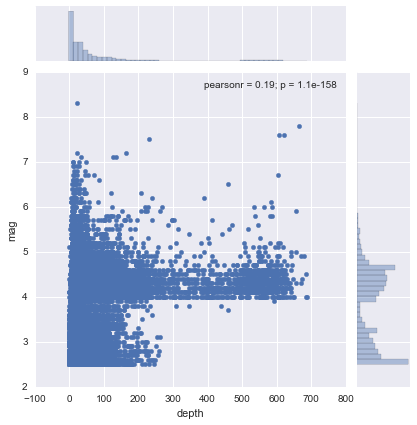

In [160]:
sns.jointplot(data.depth, data.mag)

In [207]:
def magclassify(mag):
    if mag < 4:
        return "minor"
    elif mag < 5:
        return "light"
    elif mag < 6:
        return "moderate"
    elif mag < 7:
        return "strong"
    elif mag < 8:
        return "major"
    elif mag >= 8:
        return "great"


In [208]:
data["magClassified"] = data["mag"].apply(magclassify)
data["magClassified"]

0            major
1            major
2            major
3            major
4            major
5            major
6            major
7            major
8            major
9            major
10           major
11          strong
12           major
13           great
14           great
15           major
16          strong
17           great
18           major
19        moderate
20          strong
21           great
22          strong
23           great
24           great
25           major
26           major
27           major
28          strong
29          strong
            ...   
686938       minor
686939       light
686940       light
686941       minor
686942       light
686943       minor
686944       light
686945       light
686946       minor
686947       minor
686948       light
686949       minor
686950       minor
686951       minor
686952       minor
686953       light
686954       minor
686955       light
686956       light
686957       light
686958    moderate
686959      

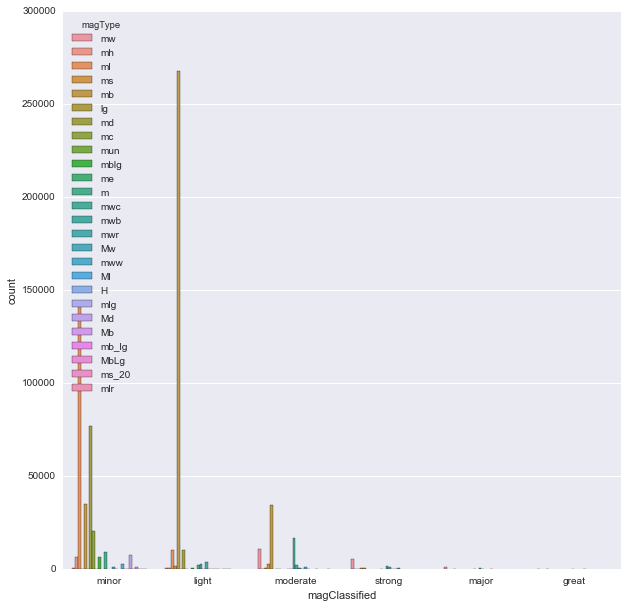

In [209]:
plt.figure(figsize=(10, 10))
sns.countplot(x="magClassified", hue= "magType",order= ["minor", "light", "moderate", "strong","major","great"],data=data,)


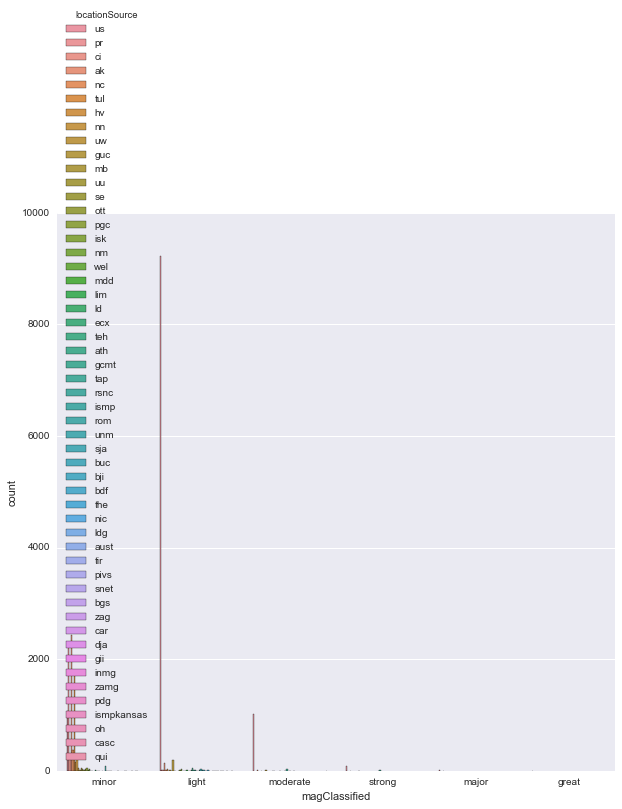

In [165]:
plt.figure(figsize=(10, 10))
sns.countplot(x="magClassified", hue= "locationSource",order= ["minor", "light", "moderate", "strong","major","great"],data=data,)


In [166]:
data.groupby(["locationSource", "magType"]).mean()

latitude   longitude       depth       mag  \
locationSource magType                                                
ak             Ml       57.047500 -157.121000    4.800000  4.700000   
               mb       52.322278 -133.764649   39.175130  4.048187   
               ml       56.453600 -137.043226   55.715914  2.850668   
               ms       59.383967 -153.862700  102.033333  6.233333   
               mww      59.620400 -153.339200  125.600000  7.100000   
ath            mb       37.286516   22.418387   15.668421  4.378947   
               mwr      38.778440   21.113560   24.120000  4.440000   
               mww      37.745000   22.835000   12.250000  5.575000   
aust           mb      -29.811500  138.178500   10.500000  4.550000   
bdf            mb      -10.400000  -70.540000  655.000000  4.300000   
bgs            mb       53.176000    2.168000    4.000000  4.200000   
               ml       52.714000   -0.693000    2.000000  2.800000   
bji            mb       29.010000  101.265000    9.250000  4.300000   
buc            mb       45.760071   26.580986   82.614143  4.114286   
               ml       45.687400   26.650500  129.850000  4.100000   
car            mwr      10.745000  -67.345000   79.800000  4.400000   
casc           mb       10.054500  -83.509700   16.000000  4.500000   
ci             ml       33.757562 -116.824908    8.678159  2.880447   
               mlr      33.665750 -117.543917    6.275000  3.580000   
               mw       34.482939 -117.116912    7.562474  3.901579   
dja            mb       -4.880000  104.030000   10.000000  4.100000   
ecx            ml       30.936333 -115.680000   16.000000  3.500000   
gcmt           mwc     -14.247833   -7.061333   33.620000  5.568333   
gii            mb       31.397100   35.478100   13.000000  4.200000   
guc            mb      -28.036577  -70.627658   67.137342  4.291139   
               ml      -30.368842  -71.347526   40.726316  3.994737   
               mwr     -30.188325  -71.559025   40.390000  4.347500   
               mww     -27.555800  -70.959200   50.440000  5.060000   
hv             md       19.314722 -155.348889   20.423467  2.612667   
               ml       19.402932 -155.416172   11.834385  2.888392   
...                           ...         ...         ...       ...   
the            mb       38.696720   21.138380   11.140000  4.300000   
               mwr      40.053767   23.239167    7.900000  4.133333   
tir            mb       41.363650   20.248100   10.890000  4.500000   
tul            mb       36.839300  -98.269100    4.864000  4.100000   
               mb_lg    36.413725  -98.042900    5.729500  2.925000   
               ml       36.365926  -97.723434    5.388932  2.845691   
               mwr      36.333583  -97.697740    5.100596  3.647115   
               mww      36.495500  -98.725400    4.058000  4.700000   
unm            mb       16.015922  -95.336456   72.687805  4.187805   
               md       20.943000 -103.374000   10.000000  3.900000   
               mww      14.337000  -94.137000    5.000000  5.700000   
us             Mb      -14.881100  167.448400  119.700000  4.600000   
               Ml       35.742900  -97.356900    6.500000  2.600000   
               mb        0.025170   30.935230   93.757452  4.450073   
               mb_lg    36.536808  -97.544755    5.357114  2.837398   
               md        4.552315  -81.744900   26.723846  3.569231   
               ml       46.311994 -122.777139   26.913048  3.046825   
               mwb      -1.458945   -6.861824   42.701452  5.422581   
               mwc     -12.209356  -14.237691   20.596250  5.484375   
               mwr     -10.105050  -42.638791   25.279360  4.370041   
               mww      -3.162058    5.246189   63.194361  5.731389   
uu             md       44.676333 -110.007833   14.830000  2.670000   
               ml       39.351326 -112.135091    6.496154  2.813846   
               mw       37.847333 -112.465667    

In [167]:
data.groupby(["locationSource", "magType"]).count()

time  latitude  longitude  depth   mag  nst   gap  \
locationSource magType                                                      
ak             Ml          1         1          1      1     1    0     0   
               mb        193       193        193    193   193    0    47   
               ml       2394      2394       2394   2394  2394  277   544   
               ms          3         3          3      3     3    0     0   
               mww         1         1          1      1     1    0     0   
ath            mb         38        38         38     38    38    0     0   
               mwr         5         5          5      5     5    0     0   
               mww         4         4          4      4     4    0     0   
aust           mb          2         2          2      2     2    0     0   
bdf            mb          1         1          1      1     1    0     0   
bgs            mb          1         1          1      1     1    0     0   
               ml          1         1          1      1     1    0     0   
bji            mb          4         4          4      4     4    0     0   
buc            mb          7         7          7      7     7    0     6   
               ml          2         2          2      2     2    0     2   
car            mwr         2         2          2      2     2    0     0   
casc           mb          1         1          1      1     1    0     0   
ci             ml        246       246        246    246   246  243   246   
               mlr         2         2          2      2     2    2     2   
               mw         19        19         19     19    19   19    19   
dja            mb          1         1          1      1     1    0     0   
ecx            ml          3         3          3      3     3    0     0   
gcmt           mwc        60        60         60     60    60    0     0   
gii            mb          1         1          1      1     1    0     0   
guc            mb        158       158        158    158   158    0     0   
               ml         19        19         19     19    19    0     0   
               mwr        40        40         40     40    40    0     0   
               mww         5         5          5      5     5    0     0   
hv             md         15        15         15     15    15   15    15   
               ml        143       143        143    143   143  139   142   
...                      ...       ...        ...    ...   ...  ...   ...   
the            mb          5         5          5      5     5    0     0   
               mwr         3         3          3      3     3    0     0   
tir            mb          2         2          2      2     2    0     0   
tul            mb          1         1          1      1     1    0     1   
               mb_lg       4         4          4      4     4    0     4   
               ml       1694      1694       1694   1694  1694    0  1598   
               mwr       104       104        104    104   104    0    82   
               mww         1         1          1      1     1    0     1   
unm            mb         41        41         41     41    41    0     0   
               md          1         1          1      1     1    0     0   
               mww         1         1          1      1     1    0     0   
us             Mb          1         1          1      1     1    0     1   
               Ml          1         1          1      1     1    0     1   
               mb       9606      9606       9606   9606  9606    0  9606   
               mb_lg     246       246        246    246   246    0   246   
               md         13        13         13     13    13    0    13   
               ml        630       630        630    630   630    0   630   
               mwb        62        62         62     62    62    0    62   
               mwc        32        32         32     32    32    0    32   
               mwr  

In [154]:
import time
# data["timeDiff"] = data.time - data.updated
def convertTime(data, part):
    converted = data[part].apply(lambda x: x[:-5])
    converted = converted.apply(lambda x: time.strptime(x, "%Y-%m-%dT%H:%M:%S"))
    return converted

s = time.strptime("2016-02-27T21:34:40Z", "%Y-%m-%dT%H:%M:%SZ")
converted = convertTime(data, "time")
convertedU = convertTime(data, "updated")
for i in range(1458):
    errortime +=  time.mktime(convertedU[i]) -time.mktime(converted[i])
print errortime/1458/60/60

686.893280178


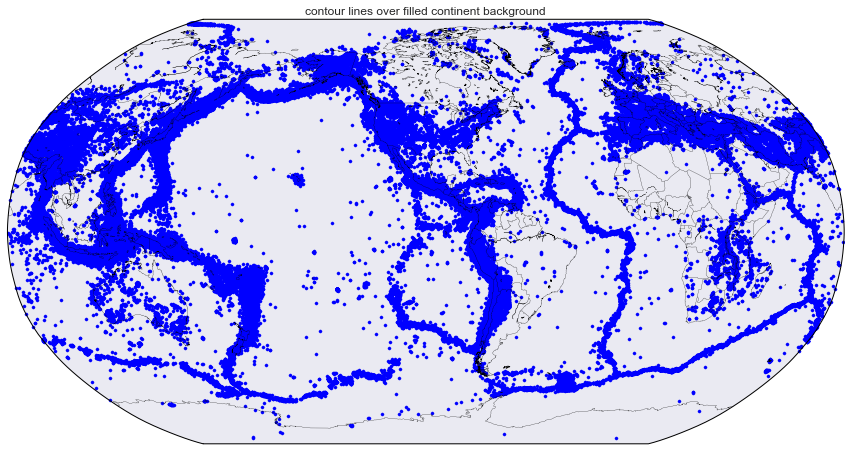

In [210]:
plt.figure(figsize=(15,15))
map = Basemap(projection='robin',lat_0=0,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
x,y = map(np.array(data.longitude), np.array(data.latitude))
map.scatter(x,y ,10,marker='o',color='b')
plt.title('contour lines over filled continent background')
plt.show()

In [211]:
us = data[data["magSource"] =="us"]
ak = data[data["locationSource"] =="ak"]

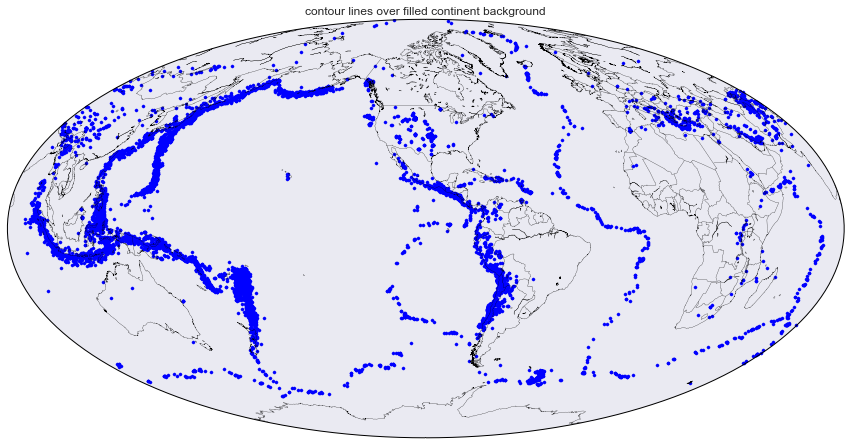

In [200]:
plt.figure(figsize=(15,15))
map = Basemap(projection='hammer',lat_0=0,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
x,y = map(np.array(us.longitude), np.array(us.latitude))
map.scatter(x,y ,10,marker='o',color='b')
plt.title('contour lines over filled continent background')
plt.show()